In [2]:
from sympy import *
import matplotlib.pyplot as plt

m = MatrixSymbol('m', 3, 1) #wheel, body, hand
I = MatrixSymbol('I', 3, 1) #wheel, body, hand link inertias about CoM
N = MatrixSymbol('N', 3, 1) #wheel, shoulder, and elbow gear ratios
J = MatrixSymbol('J', 3, 1) #wheel, shoulder, and elbow motor rotor inertias 
L = MatrixSymbol('L', 2, 1) #upper arm, forearm
g = symbols('g') #gravity

#states: [wheel position, pendulum angle, leg length, shoulder angle, elbow angle] 
q = MatrixSymbol('q', 5, 1)
qd = MatrixSymbol('\dot{q}', 5, 1)
qdd = MatrixSymbol('\ddot{q}', 5, 1)
tau = MatrixSymbol('tau', 4, 1)

# Unit vector (global coordinate system)
xhat = Matrix([1, 0])
yhat = Matrix([0, 1])

xhat_pend = cos(q[1])*xhat + sin(q[1])*yhat
yhat_pend = -sin(q[1])*xhat + cos(q[1])*yhat

xhat_upperarm = cos(q[3])*xhat_pend + sin(q[3])*yhat_pend
yhat_upperarm = -sin(q[3])*xhat_pend + cos(q[3])*yhat_pend

xhat_lowerarm = cos(q[4])*xhat_upperarm + sin(q[4])*yhat_upperarm
yhat_lowerarm = -sin(q[4])*xhat_upperarm + cos(q[4])*yhat_upperarm

p_wheel = q[0]*xhat
p_body = simplify(p_wheel + q[2]*yhat_pend)
p_elbow = simplify(p_body - L[0]*yhat_upperarm)
p_hand = simplify(p_elbow - L[1]*yhat_lowerarm)

display(p_wheel, p_body, p_elbow, p_hand)

Matrix([
[q[0, 0]],
[      0]])

Matrix([
[-sin(q[1, 0])*q[2, 0] + q[0, 0]],
[           cos(q[1, 0])*q[2, 0]]])

Matrix([
[sin(q[1, 0] + q[3, 0])*L[0, 0] - sin(q[1, 0])*q[2, 0] + q[0, 0]],
[         -cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0])*q[2, 0]]])

Matrix([
[sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - sin(q[1, 0])*q[2, 0] + q[0, 0]],
[         -cos(q[1, 0] + q[3, 0])*L[0, 0] - cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] + cos(q[1, 0])*q[2, 0]]])

In [3]:
def derivative(x):
    x = Matrix([x])
    return x.jacobian(Matrix([q,qd])) * Matrix([qd,qdd])

pd_wheel = simplify(derivative(p_wheel))
pd_body = simplify(derivative(p_body))
pd_elbow = simplify(derivative(p_elbow))
pd_hand = simplify(derivative(p_hand))

a = Matrix([ #wheel, shoulder, and elbow joint angles referenced to global frame +x
    q[1] + pi/2, 
    q[1] + pi/2 - pi + q[3],
    q[1] + pi/2 - pi + q[3] + q[4],
])
ad = derivative(a)

display(pd_wheel, pd_body, pd_elbow, pd_hand, ad)

Matrix([
[\dot{q}[0, 0]],
[            0]])

Matrix([
[-sin(q[1, 0])*\dot{q}[2, 0] - cos(q[1, 0])*\dot{q}[1, 0]*q[2, 0] + \dot{q}[0, 0]],
[                -sin(q[1, 0])*\dot{q}[1, 0]*q[2, 0] + cos(q[1, 0])*\dot{q}[2, 0]]])

Matrix([
[(cos(q[1, 0] + q[3, 0])*L[0, 0] - cos(q[1, 0])*q[2, 0])*\dot{q}[1, 0] - sin(q[1, 0])*\dot{q}[2, 0] + cos(q[1, 0] + q[3, 0])*L[0, 0]*\dot{q}[3, 0] + \dot{q}[0, 0]],
[                (sin(q[1, 0] + q[3, 0])*L[0, 0] - sin(q[1, 0])*q[2, 0])*\dot{q}[1, 0] + sin(q[1, 0] + q[3, 0])*L[0, 0]*\dot{q}[3, 0] + cos(q[1, 0])*\dot{q}[2, 0]]])

Matrix([
[(cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*\dot{q}[1, 0] - sin(q[1, 0])*\dot{q}[2, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + \dot{q}[0, 0]],
[                (sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - sin(q[1, 0])*q[2, 0])*\dot{q}[1, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + cos(q[1, 0])*\dot{q}[2, 0]]])

Matrix([
[                                \dot{q}[1, 0]],
[                \dot{q}[1, 0] + \dot{q}[3, 0]],
[\dot{q}[1, 0] + \dot{q}[3, 0] + \dot{q}[4, 0]]])

Matrix([
[0],
[0]])

Matrix([
[-0.479425538604203],
[ 0.877582561890373]])

Matrix([
[-0.137831147964418],
[ 0.669464152605097]])

Matrix([
[0.153698088434623],
[0.740250481261073]])

Matrix([
[   2.0707963267949],
[-0.547197551196598],
[ 0.238200612200851]])

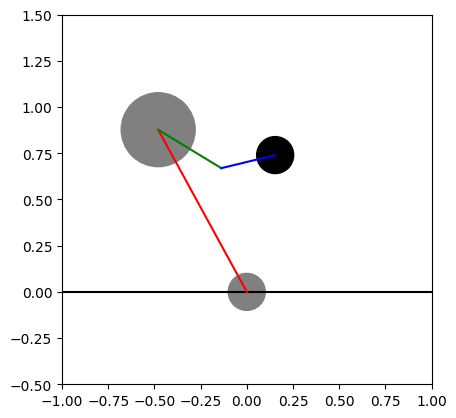

In [4]:
q_test = Matrix([0, 0.5, 1, pi/6, pi/4])
L_test = Matrix([0.4, 0.3])
subs_dict = {q:q_test, L:L_test}

p_wheel_n = p_wheel.subs(subs_dict).n()
p_body_n = p_body.subs(subs_dict).n()
p_elbow_n = p_elbow.subs(subs_dict).n()
p_hand_n = p_hand.subs(subs_dict).n()
a_n = a.subs(subs_dict).n()
display(p_wheel_n, p_body_n, p_elbow_n, p_hand_n, a_n)

fig, ax = plt.subplots()
def plot_link(ax, a, b, c='k'):
    ax.plot([a[0], b[0]], [a[1], b[1]], c=c)

plot_link(ax, (-1,0), (1,0))
plot_link(ax, p_wheel_n, p_body_n, 'r')
plot_link(ax, p_body_n, p_elbow_n, 'g')
plot_link(ax, p_elbow_n, p_hand_n, 'b')

ax.add_artist(plt.Circle((p_wheel_n[0], p_wheel_n[1]), 0.1, color='gray'))
ax.add_artist(plt.Circle((p_body_n[0], p_body_n[1]), 0.2, color='gray'))
ax.add_artist(plt.Circle((p_hand_n[0], p_hand_n[1]), 0.1, color='black'))

ax.set_xlim([-1, 1])
ax.set_ylim([-0.5, 1.5])
ax.set_aspect('equal')
plt.show()

In [5]:
# Kinetic energy of structural parts
T_lin = 0.5 * (m[0]*pd_wheel.dot(pd_wheel) + m[1]*pd_body.dot(pd_body) + m[2]*pd_hand.dot(pd_hand))      # rectilinear KE
T_rot = 0.5 * (I[0]*ad[0]*ad[0] + I[1]*ad[1]*ad[1] + I[2]*ad[2]*ad[2])      # rotational link KE

# Kinetic energy of motor
v_mot = Matrix([
    N[0]*qd[0], #wheel motor
    N[1]*qd[3], #shoulder motor
    N[2]*qd[4], #elbow motor
])
T_mot = 0.5 * (J[0]*v_mot[0]*v_mot[0] + J[1]*v_mot[1]*v_mot[1] + J[2]*v_mot[2]*v_mot[2])

T_lin = nsimplify(T_lin)
T_rot = nsimplify(T_rot)
T_mot = nsimplify(T_mot)
display(T_lin, T_rot, T_mot)

T = simplify(T_lin + T_rot + T_mot)     # Kinetic Energy

((-sin(q[1, 0])*\dot{q}[1, 0]*q[2, 0] + cos(q[1, 0])*\dot{q}[2, 0])**2 + (-sin(q[1, 0])*\dot{q}[2, 0] - cos(q[1, 0])*\dot{q}[1, 0]*q[2, 0] + \dot{q}[0, 0])**2)*m[1, 0]/2 + (((sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - sin(q[1, 0])*q[2, 0])*\dot{q}[1, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + cos(q[1, 0])*\dot{q}[2, 0])**2 + ((cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*\dot{q}[1, 0] - sin(q[1, 0])*\dot{q}[2, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + \dot{q}[0, 0])**2)*m[2, 0]/2 + \dot{q}[0, 0]**2*m[0, 0]/2

(\dot{q}[1, 0] + \dot{q}[3, 0])**2*I[1, 0]/2 + (\dot{q}[1, 0] + \dot{q}[3, 0] + \dot{q}[4, 0])**2*I[2, 0]/2 + I[0, 0]*\dot{q}[1, 0]**2/2

J[0, 0]*N[0, 0]**2*\dot{q}[0, 0]**2/2 + J[1, 0]*N[1, 0]**2*\dot{q}[3, 0]**2/2 + J[2, 0]*N[2, 0]**2*\dot{q}[4, 0]**2/2

In [6]:
# Potential energy of body and hand
V = simplify(p_body[1]*m[1]*g + p_hand[1]*m[2]*g)
display(V)

g*(-(cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*m[2, 0] + cos(q[1, 0])*m[1, 0]*q[2, 0])

In [7]:
# Define Lagrangian
Lag = T-V               # Lagrangian
Lag = simplify(nsimplify(Lag))

# Define Generalized Work
dW = tau[0]*qd[0] + tau[1]*qd[1]
display(Lag, dW)

g*((cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*m[2, 0] - cos(q[1, 0])*m[1, 0]*q[2, 0]) + ((sin(q[1, 0])*\dot{q}[1, 0]*q[2, 0] - cos(q[1, 0])*\dot{q}[2, 0])**2 + (sin(q[1, 0])*\dot{q}[2, 0] + cos(q[1, 0])*\dot{q}[1, 0]*q[2, 0] - \dot{q}[0, 0])**2)*m[1, 0]/2 + (((sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - sin(q[1, 0])*q[2, 0])*\dot{q}[1, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + cos(q[1, 0])*\dot{q}[2, 0])**2 + ((cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*\dot{q}[1, 0] - sin(q[1, 0])*\dot{q}[2, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + \dot{q}[0, 0])**2)*m[2, 0]/2 + (\dot{q}[1, 0] + \dot{q}[3, 0])**2*I[1, 0]/2 + (\dot{q}[1, 0] 

\dot{q}[0, 0]*tau[0, 0] + \dot{q}[1, 0]*tau[1, 0]

In [8]:
# Euler-Lagrangian Equation of Motion (EoM)
EoM_LHS = zeros(5, 1)
for i in range(5):
    partial_dq_ = simplify(diff(Lag, qd[i]))
    partial_q_ = simplify(diff(Lag, q[i]))
    EoM_LHS[i] = derivative(partial_dq_)[0] - partial_q_

# EoM_RHS = Matrix([dW]).jacobian(qd)
display(EoM_LHS)

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [22]:
M = simplify(EoM_LHS.jacobian(qdd))
display(M)

Matrix([
[                                                                                         J[0, 0]*N[0, 0]**2 + m[0, 0] + m[1, 0] + m[2, 0],                                                                                                                                  (cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*m[2, 0] - cos(q[1, 0])*m[1, 0]*q[2, 0],                               (-m[1, 0] - m[2, 0])*sin(q[1, 0]),                                                                                                                                (cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*m[2, 0],                                                                      cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*m[2, 0]],
[(cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*m[2, 0] - cos(q[1, 0])*m[1, 0]*q[2, 0], ((sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0]

In [25]:
C = simplify(EoM_LHS.subs({qdd:Matrix([0,0,0,0,0])}))
display(C)

Matrix([
[                                                                                                                                                                                                                                                  ((sin(q[1, 0])*\dot{q}[1, 0]*q[2, 0] - cos(q[1, 0])*\dot{q}[2, 0])*m[1, 0] - ((sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - sin(q[1, 0])*q[2, 0])*\dot{q}[1, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + cos(q[1, 0])*\dot{q}[2, 0])*m[2, 0])*\dot{q}[1, 0] - (m[1, 0] + m[2, 0])*cos(q[1, 0])*\dot{q}[1, 0]*\dot{q}[2, 0] - ((sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[1, 0] + (sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0])*\dot{q}[3, 0]*m[2, 0] - (\dot{q}[1, 0] + \dot{q}[

In [20]:
lambdify([q, qd, L, I, J, N, g], M)
# lambdify([q, qd, L, I, J, N, g], c)

<function _lambdifygenerated(q, Dummy_46, L, I, J, N, g)>

In [17]:
print(python(M))

e = ImmutableDenseMatrix([[J[0, 0]*N[0, 0]**2 + m[0, 0] + m[1, 0] + m[2, 0], (cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*m[2, 0] - cos(q[1, 0])*m[1, 0]*q[2, 0], (-m[1, 0] - m[2, 0])*sin(q[1, 0]), (cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*m[2, 0], cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*m[2, 0]], [(cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])*m[2, 0] - cos(q[1, 0])*m[1, 0]*q[2, 0], ((sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - sin(q[1, 0])*q[2, 0])**2 + (cos(q[1, 0] + q[3, 0])*L[0, 0] + cos(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - cos(q[1, 0])*q[2, 0])**2)*m[2, 0] + I[0, 0] + I[1, 0] + I[2, 0] + m[1, 0]*q[2, 0]**2, (sin(q[3, 0] + q[4, 0])*L[1, 0] + sin(q[3, 0])*L[0, 0])*m[2, 0], -cos(q[3, 0] + q[4, 0])*L[1, 0]*m[2, 0]*q[2, 0] - cos(q[3, 0])*L[0, 0]*m[2, 0]*q[2, 0] + 2*cos(q[4, 0])*L[0, 0]*L[1, 0]*m[2, 0] + I[1, 0] + 

In [27]:
print(python(c))

g = Symbol('g')
e = ImmutableDenseMatrix([[((sin(q[1, 0])*\dot{q}[1, 0]*q[2, 0] - cos(q[1, 0])*\dot{q}[2, 0])*m[1, 0] - ((sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + (sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0] - sin(q[1, 0])*q[2, 0])*\dot{q}[1, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0] + cos(q[1, 0])*\dot{q}[2, 0])*m[2, 0])*\dot{q}[1, 0] - (m[1, 0] + m[2, 0])*cos(q[1, 0])*\dot{q}[1, 0]*\dot{q}[2, 0] - ((sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[1, 0] + (sin(q[1, 0] + q[3, 0])*L[0, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0])*\dot{q}[3, 0] + sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0])*\dot{q}[3, 0]*m[2, 0] - (\dot{q}[1, 0] + \dot{q}[3, 0] + \dot{q}[4, 0])*sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*\dot{q}[4, 0]*m[2, 0]], [g*sin(q[1, 0] + q[3, 0])*L[0, 0]*m[2, 0] + g*sin(q[1, 0] + q[3, 0] + q[4, 0])*L[1, 0]*m[2, 0] - g*sin(q[1, 0])*m[1, 0]*q